# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Expérience ObsInfo2307
### Calcul du Kappa de Fleiss

---

# Imports

In [ ]:
cd ../..

In [ ]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Chargement Données

In [3]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

sheet_id = '1bEXdqyD7so-xm54_k-FMZchVVIcO8HjPSY1mA-wGW-w'
range_name = 'Data'

df_obsinfo = gs.read_df(sheet_id,range_name)

In [4]:
labels = [
    'infox',
    'lieux, dates et personnes',
    'faits',
    'opinions',
    'subjectif',
    'propos rapporté',
    'sources citées',
    'fausse nouvelle',
    'insinuation',
    'exagération',
    'titre décalé',
]

In [5]:
import numpy as np

In [6]:
def normalize(x):
    if x == '0':
        return 0.0
    elif x== '1':
        return 1.0
    else:
        return np.NaN

In [7]:
for label in labels:
    df_obsinfo[label]=df_obsinfo[label].apply(normalize)

In [8]:
df_obsinfo['url_h'] = df_obsinfo['url_labelizer'].apply(lambda s: s[-40:])

# Kappa de Fleiss

## Calcul par label

In [38]:
label = 'infox'

In [45]:
df_notna = df_obsinfo[df_obsinfo[label].notna()][['title',label]]

In [47]:
df_notna

,title,infox
0,La relation entre la technologie et la religion,0.0
1,"Confinement. Les habitants de Brest, Morlaix e...",0.0
2,La Chine : Le premier marché mondial de Smartp...,0.0
3,"Emmanuel à Olivier : « Tiens bon, on les aura ...",1.0
4,"Selon UBS, les « propriétés d’assurance tant d...",0.0
...,...,...
795,Loi climat : le gouvernement va exempter Amazo...,0.0
796,Le QI peut-il être augmenté par l’éducation ? ...,0.0
797,Secte sexuelle : l’ex-star de Smallville Aliso...,0.0
798,Sacre de Charles III par SAR le Prince Charles...,0.0


## Agrégation des données

In [25]:
def count_0(label_series):
    return len (label_series[label_series==0])

In [27]:
def count_1(label_series):
    return len (label_series[label_series==1])

In [28]:
count_1(df_obsinfo['infox'])

300

In [31]:
df_agg1 = df_obsinfo.pivot_table(index='title',values=labels,aggfunc=count_1)
df_agg1

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",7,8,6,8,5,8,8,4,7,8,1
"""Tully"": Charlize Theron super-maman (critique)",0,7,0,0,0,7,8,2,5,3,0
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,4,8,1,2,5,8,7,2,4,7,0
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",0,8,0,0,1,8,3,2,7,0,0
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",1,8,0,1,1,8,4,2,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",5,8,3,5,5,7,8,8,3,6,1
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",7,8,3,3,4,8,8,1,6,8,1
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",6,8,1,2,4,8,8,3,7,8,0


In [33]:
df_agg0 = df_obsinfo.pivot_table(index='title',values=labels,aggfunc=count_0)
df_agg0

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",1,0,2,0,3,0,0,4,1,0,7
"""Tully"": Charlize Theron super-maman (critique)",8,1,8,8,8,1,0,6,3,5,8
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,4,0,7,6,3,0,1,6,4,1,8
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",8,0,8,8,7,0,5,6,1,8,8
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",7,0,8,7,7,0,4,6,2,8,8
...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",3,0,5,3,3,1,0,0,5,2,7
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",1,0,5,5,4,0,0,7,2,0,7
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",2,0,7,6,4,0,0,5,1,0,8


In [36]:
pd.concat([df_agg0,df_agg1],axis=1)

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,...,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",1,0,2,0,3,0,0,4,1,0,...,8,6,8,5,8,8,4,7,8,1
"""Tully"": Charlize Theron super-maman (critique)",8,1,8,8,8,1,0,6,3,5,...,7,0,0,0,7,8,2,5,3,0
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,4,0,7,6,3,0,1,6,4,1,...,8,1,2,5,8,7,2,4,7,0
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",8,0,8,8,7,0,5,6,1,8,...,8,0,0,1,8,3,2,7,0,0
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",7,0,8,7,7,0,4,6,2,8,...,8,0,1,1,8,4,2,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",3,0,5,3,3,1,0,0,5,2,...,8,3,5,5,7,8,8,3,6,1
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",1,0,5,5,4,0,0,7,2,0,...,8,3,3,4,8,8,1,6,8,1
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",2,0,7,6,4,0,0,5,1,0,...,8,1,2,4,8,8,3,7,8,0


# Moyennes et accords

In [12]:
df_mean = df_obsinfo.pivot_table(index='title',values=labels,aggfunc='mean')

In [13]:
df_accord = df_mean.apply(lambda x : abs(2*x-1))

## Sommes des Moyennes

In [12]:
mean_sum = pd.DataFrame(df_mean.sum(),columns=['mean']).sort_values('mean')
mean_sum

,mean
titre décalé,10.660714
fausse nouvelle,23.357143
propos rapporté,30.964286
infox,37.767857
exagération,45.000000
insinuation,45.446429
subjectif,60.375000
sources citées,71.446429
opinions,72.982143
"lieux, dates et personnes",94.107143


<Axes: >

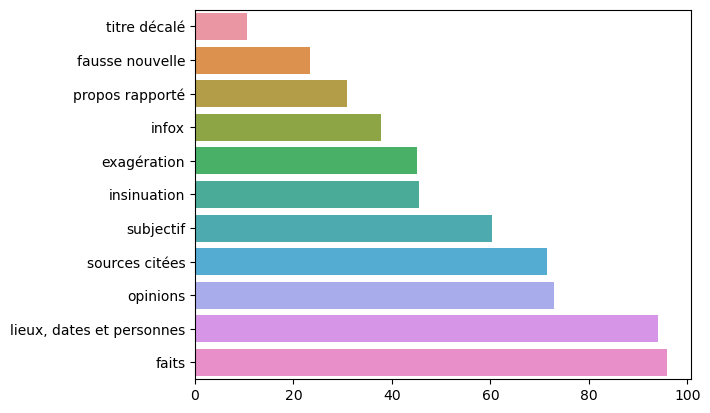

In [13]:
sns.barplot(mean_sum.T,orient="h")

### Constats
- Des labels souvent à 0 ou à 1 :
    - titre décalé : 10% de 1
    - fausse nouvelle : 23% de 1
    - Lieux dates et personnes : 94% de 1
    - faits : 95 %

## Sommes des Accords

In [14]:
accord_sum = pd.DataFrame(df_accord.sum(),columns=['sum']).sort_values('sum')
accord_sum

,sum
insinuation,50.750000
propos rapporté,55.285714
sources citées,59.392857
infox,62.892857
exagération,63.000000
opinions,66.750000
fausse nouvelle,68.071429
subjectif,71.535714
titre décalé,79.964286
"lieux, dates et personnes",88.214286


<Axes: >

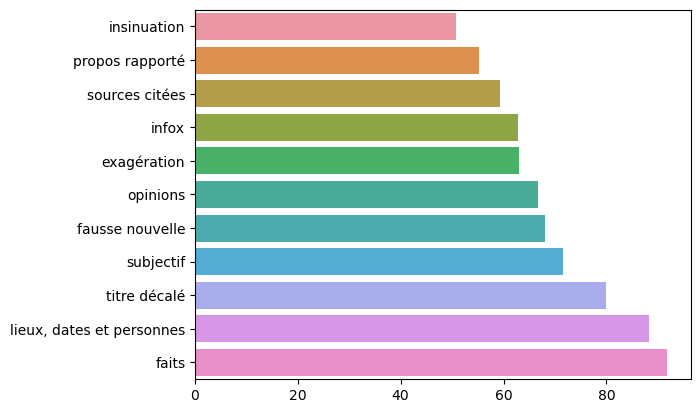

In [15]:
sns.barplot(accord_sum.T,orient="h")

## Comptage accords > seuil

In [16]:
threshold = 0.75

In [19]:
accord_count = pd.DataFrame(df_accord.apply(lambda x: x>=threshold).sum(),columns=['count']).sort_values('count')
accord_count

,count
propos rapporté,34
insinuation,39
sources citées,48
infox,52
exagération,58
fausse nouvelle,58
opinions,59
subjectif,66
titre décalé,79
"lieux, dates et personnes",88


<Axes: >

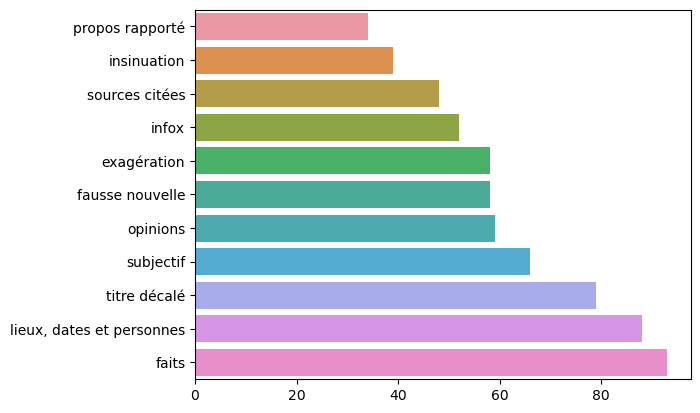

In [20]:
sns.barplot(accord_count.T,orient="h")

## Polarité des accords

In [21]:
df_accord_filter = df_accord.apply(lambda x: x>=threshold)

In [22]:
polarities_data = {}
for index,row in df_accord_filter.iterrows():
    for col in row.keys():
        if row[col]:
            data = polarities_data.get(col,[])
            data.append(df_mean.loc[index,col])
            polarities_data[col]=data

In [23]:
polarities = []
for label in polarities_data.keys():
    polarities.append({
        'label': label,
        'acc_count': len(polarities_data[label]),
        'acc_sum': sum(polarities_data[label]),
        'total_mean': mean_sum.loc[label]['mean']/100,
    })
df_polarities = pd.DataFrame(polarities)
df_polarities['polarity']=df_polarities['acc_sum']/df_polarities['acc_count']
df_polarities['pol_bias']=df_polarities['polarity']-df_polarities['total_mean']
df_polarities

,label,acc_count,acc_sum,total_mean,polarity,pol_bias
0,exagération,58,21.375,0.450000,0.368534,-0.081466
1,faits,93,91.000,0.959286,0.978495,0.019209
2,infox,52,16.000,0.377679,0.307692,-0.069986
3,"lieux, dates et personnes",88,85.625,0.941071,0.973011,0.031940
4,opinions,59,52.250,0.729821,0.885593,0.155772
5,sources citées,48,42.250,0.714464,0.880208,0.165744
6,subjectif,66,41.625,0.603750,0.630682,0.026932
7,titre décalé,79,3.375,0.106607,0.042722,-0.063886
8,fausse nouvelle,58,5.625,0.233571,0.096983,-0.136589
9,insinuation,39,12.500,0.454464,0.320513,-0.133951


<Axes: xlabel='pol_bias', ylabel='label'>

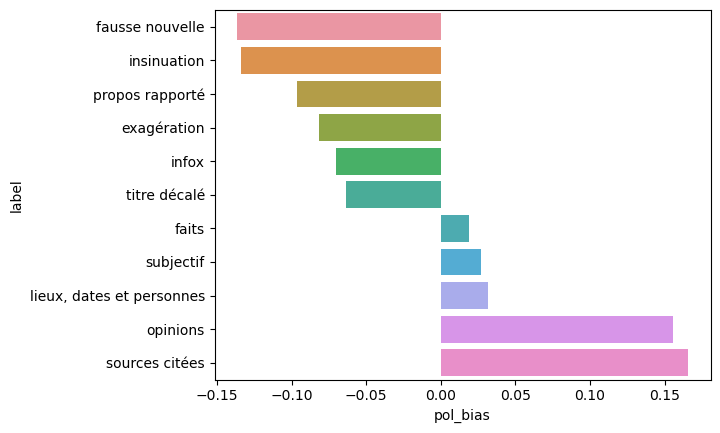

In [24]:
sns.barplot(df_polarities.sort_values('pol_bias'),y='label',x='pol_bias',)

### Constats
- Biais de polarité compris entre -0.14 et +0.17 
- Corrélation entre somme des moyennes et polarité des accords

### A calculer : Nombre d'accord par valeur 0/1, à comparer avec nombre moyen

# Comparaisons observateurs

In [25]:
df_obs = df_obsinfo.pivot_table(index='observateur',aggfunc='sum')[labels]

In [26]:
df_obs = df_obs.reset_index()

In [27]:
df_obs

,observateur,infox,"lieux, dates et personnes",faits,opinions,subjectif,propos rapporté,sources citées,fausse nouvelle,insinuation,exagération,titre décalé
0,BI,29.0,94.0,99.0,93.0,74.0,21.0,82.0,9.0,24.0,44.0,21.0
1,FB,20.0,88.0,91.0,78.0,69.0,14.0,73.0,8.0,21.0,36.0,3.0
2,FM,33.0,73.0,92.0,72.0,60.0,22.0,57.0,10.0,41.0,34.0,4.0
3,GA,34.0,100.0,100.0,87.0,52.0,22.0,87.0,32.0,54.0,42.0,16.0
4,GG,47.0,93.0,96.0,66.0,67.0,76.0,76.0,22.0,73.0,53.0,17.0
5,LL,29.0,100.0,91.0,45.0,47.0,66.0,78.0,24.0,43.0,35.0,1.0
6,MC,44.0,100.0,99.0,66.0,48.0,11.0,46.0,34.0,59.0,52.0,8.0
7,PE,64.0,100.0,96.0,74.0,63.0,14.0,68.0,46.0,46.0,61.0,14.0


<Axes: xlabel='observateur', ylabel='infox'>

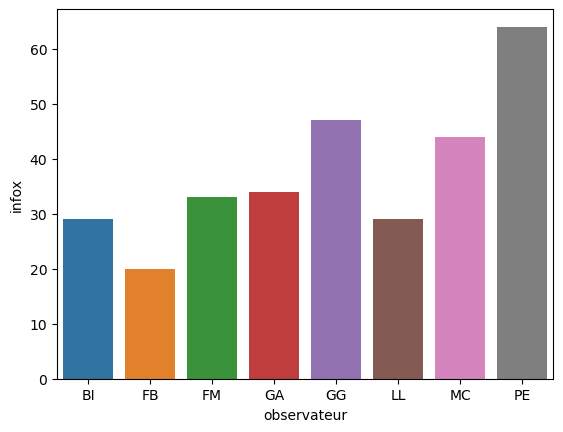

In [39]:
sns.barplot(df_obs,x='observateur',y='infox')

<Axes: xlabel='observateur', ylabel='fausse nouvelle'>

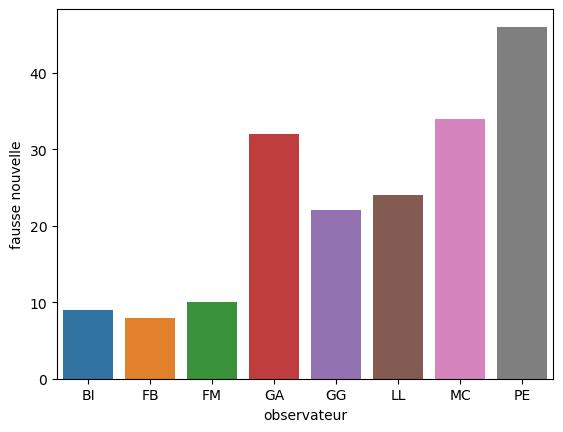

In [40]:
sns.barplot(df_obs,x='observateur',y='fausse nouvelle')

## Ecarts par label

In [45]:
df_std = pd.DataFrame(df_obs[labels].std(),columns=['std']).sort_values('std')
df_std

,std
faits,3.741657
titre décalé,7.464200
"lieux, dates et personnes",9.411239
exagération,9.855202
subjectif,10.085350
sources citées,13.548194
infox,13.721724
fausse nouvelle,13.747078
opinions,14.657397
insinuation,17.315868


<Axes: >

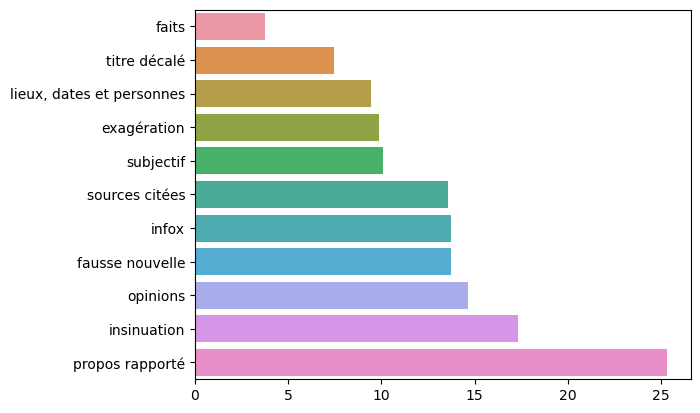

In [46]:
sns.barplot(df_std.T,orient='h')

# Prochaines étapes
---

- Nombre d'accord par valeur 0/1, à comparer avec nombre moyen
- Distance entre couples d'annotateurs
- Kappa de Fleiss
- Proposer un modele d'annotation de paragraphes

# Bricolages
---